In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [2]:
df = pd.read_csv("../data/processed/telco_churn_cleaned.csv")
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyRevenue,AnnualRevenue,RevenueLost,TenureGroup,HighValueCustomer
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,29.85,358.2,0.00,0-1 Year,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,56.95,683.4,0.00,2-4 Years,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,53.85,646.2,53.85,0-1 Year,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,42.30,507.6,0.00,2-4 Years,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,70.70,848.4,70.70,0-1 Year,0


In [3]:
df.shape


(7032, 25)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   SeniorCitizen      7032 non-null   int64  
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   tenure             7032 non-null   int64  
 5   PhoneService       7032 non-null   object 
 6   MultipleLines      7032 non-null   object 
 7   InternetService    7032 non-null   object 
 8   OnlineSecurity     7032 non-null   object 
 9   OnlineBackup       7032 non-null   object 
 10  DeviceProtection   7032 non-null   object 
 11  TechSupport        7032 non-null   object 
 12  StreamingTV        7032 non-null   object 
 13  StreamingMovies    7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  PaperlessBilling   7032 non-null   object 
 16  PaymentMethod      7032 

In [5]:
df['Churn'].value_counts(normalize=True) * 100


Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

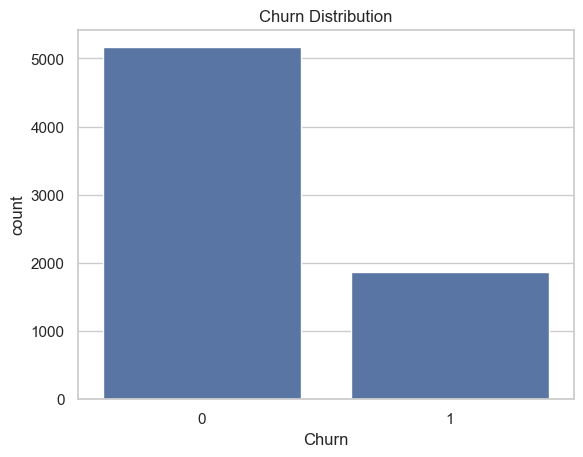

In [6]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


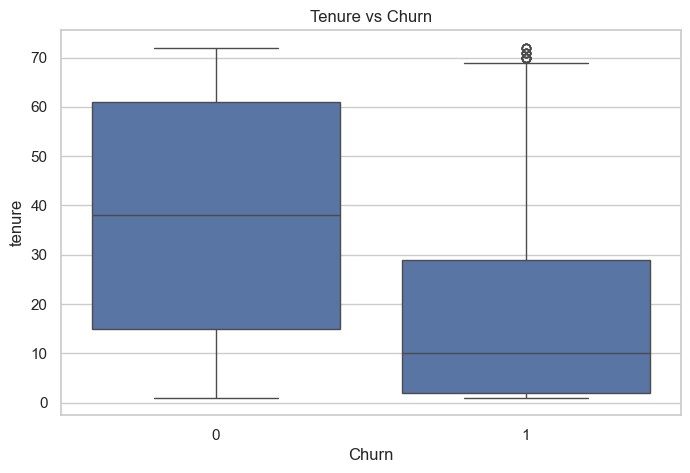

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


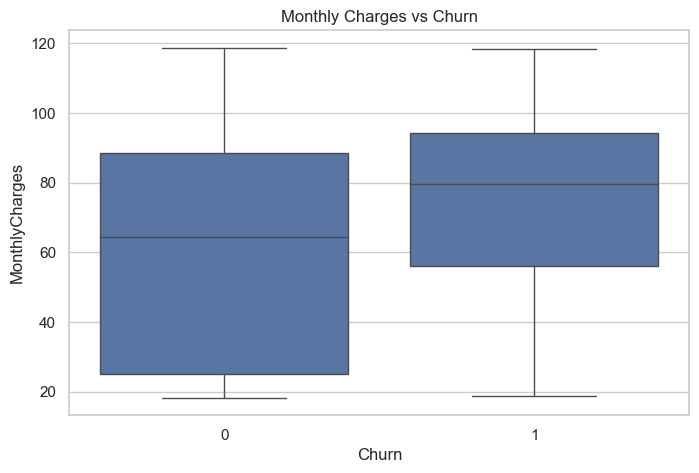

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


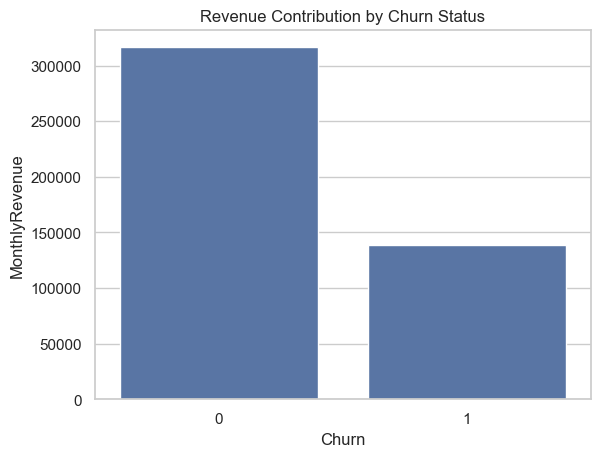

In [9]:
revenue_summary = df.groupby('Churn')['MonthlyRevenue'].sum().reset_index()

sns.barplot(x='Churn', y='MonthlyRevenue', data=revenue_summary)
plt.title("Revenue Contribution by Churn Status")
plt.show()


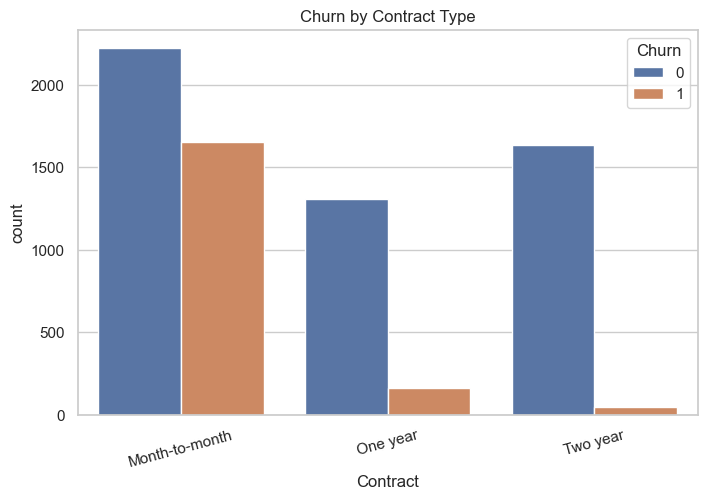

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()


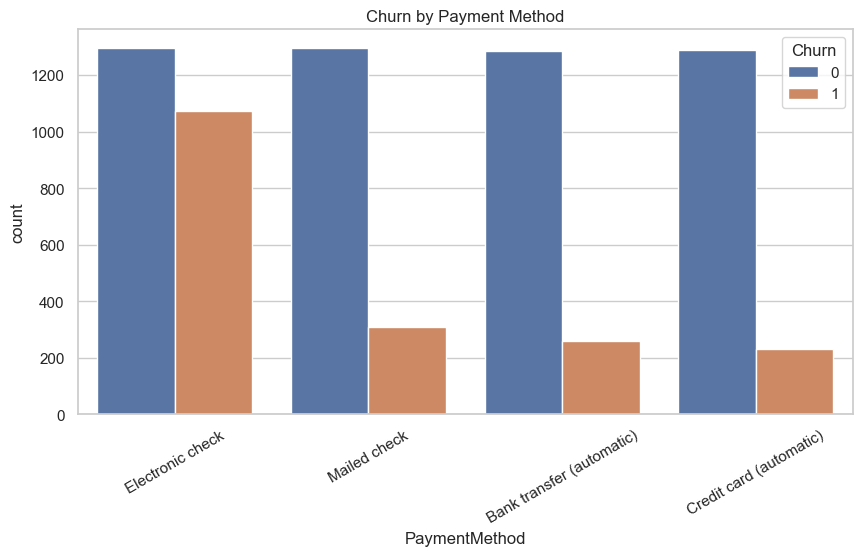

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()


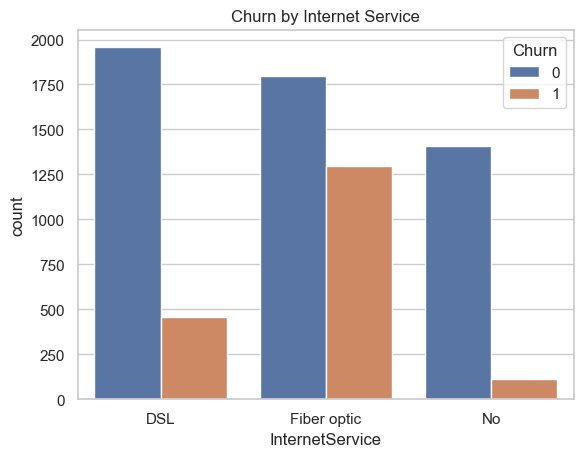

In [12]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()


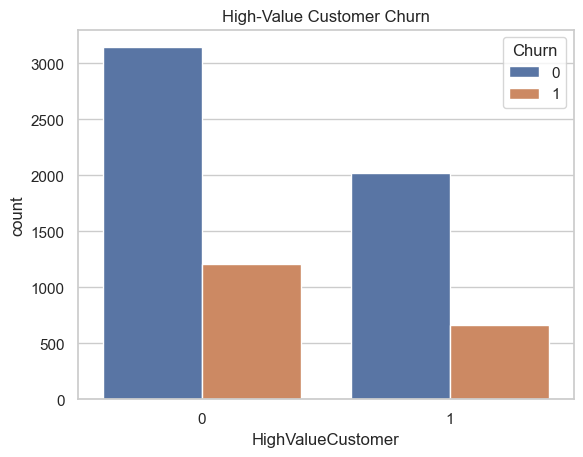

In [13]:
sns.countplot(x='HighValueCustomer', hue='Churn', data=df)
plt.title("High-Value Customer Churn")
plt.show()


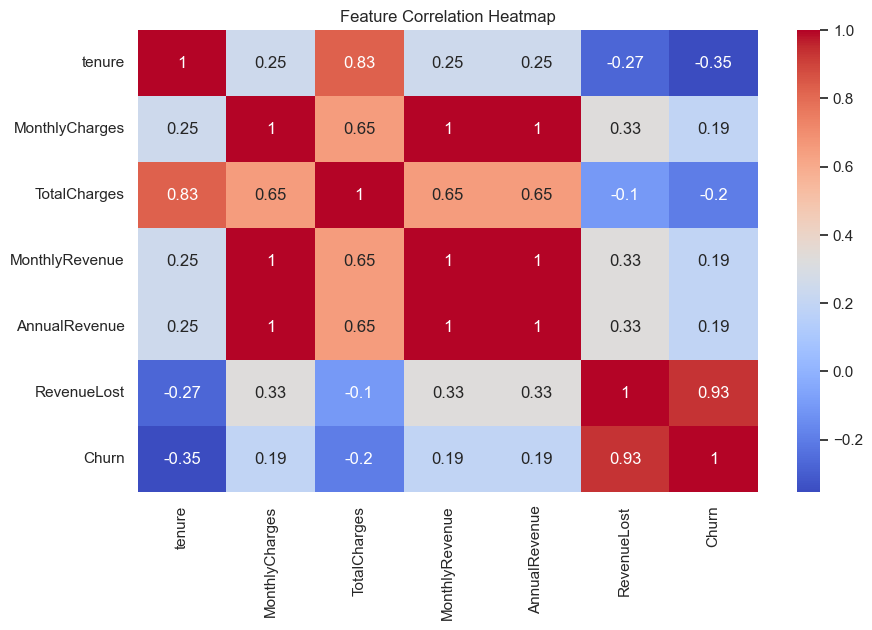

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['tenure', 'MonthlyCharges', 'TotalCharges',
        'MonthlyRevenue', 'AnnualRevenue', 'RevenueLost', 'Churn']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()
